In [1]:
#install.packages("pacman",repos='http://cran.us.r-project.org')
library(pacman)
p_load(tidyverse, data.table, igraph)

Warning message:
"package 'pacman' was built under R version 3.5.3"

In [18]:
source('distbasic.R')
source('sysfunc.R')
source('nwfunc.R')
source('priorfunc.R')

stdgrid = seq(1,200,2)/200
stdprior = data.table(f=1,p=stdgrid)

source('spvsfunc.R')
source('termfunc.R')

In [19]:
n = 15; npref = 1
pbreak = 0.1; a=3; k=1

sys = syscreate(n, seq(2,3,length.out = n),
                sample(c(rep(1,npref),rep(0,n-npref))))
sys %>% addcol(sample(seq(1,4,length.out = n)), "soc")
nw = graph.formula() + vertices(1:n)
termlist = lapply(1:n, term)
supervisor = spvs()

In [20]:
sys = syscreate(n, seq(2,3,length.out = n),
                sample(c(rep(1,npref),rep(0,n-npref))))
sys %>% addcol(sample(seq(1,4,length.out = n)), "soc")

nw = graph.formula() + vertices(1:n)
termlist = lapply(1:n, term)
supervisor = spvs()

memo = list()
memo[[1]] = list(npref=npref, sys=copy(sys),
               supervisor=copy(supervisor),
               termlist=copy(termlist))
for(i in 2:201){
    source('cycle.R')
}

Warning message in max(safe):
"max里所有的参数都不存在；回覆-Inf"Warning message in max(safe):
"max里所有的参数都不存在；回覆-Inf"Warning message in max(safe):
"max里所有的参数都不存在；回覆-Inf"Warning message in max(safe):
"max里所有的参数都不存在；回覆-Inf"Warning message in max(safe):
"max里所有的参数都不存在；回覆-Inf"Warning message in max(safe):
"max里所有的参数都不存在；回覆-Inf"Warning message in max(safe):
"max里所有的参数都不存在；回覆-Inf"Warning message in max(safe):
"max里所有的参数都不存在；回覆-Inf"Warning message in max(safe):
"max里所有的参数都不存在；回覆-Inf"Warning message in max(safe):
"max里所有的参数都不存在；回覆-Inf"Warning message in max(safe):
"max里所有的参数都不存在；回覆-Inf"

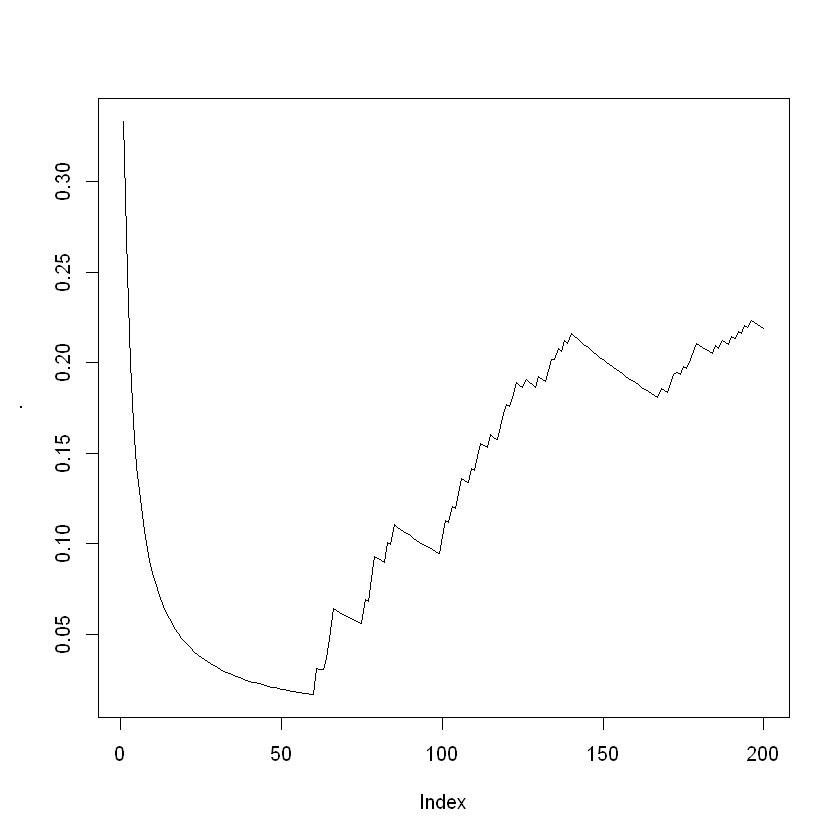

In [21]:
biascurve = function(memo){
    sapply(2:length(memo), function(i){memo[[i]]$supervisor%>%bias()})
}

memo %>% biascurve %>% plot(type="l")

In [26]:
rank(c(7,9,8,3))

[1] 2 4 3 1

In [6]:
memo[[301]]$supervisor%>%bias

[1] 0.4374313

In [13]:
temp0 = 1:5
temp0[temp0>6]%>%length()

[1] 0

In [9]:

newsus = function(ls){
    i = ls$id; s = ls$sus_hat
    punflag = (i %in% guiltyid); coef = ifelse(punflag, 1.1, 1)
    accessible = neighbors(nw, i)%>%as.integer()
    av_punished = accessible[accessible %in% guiltyid]
    if(length(av_punished)==0) return(coef * s * runif(1,0.9,1.1))
    susests = sapply(av_punished, function(i){termlist[[i]]$sus_hat}) %>% as.numeric()
    maxest = max(susests)
    if(punflag) return(1.1*max(maxest,s)*runif(1,0.9,1.1))
    runif(1,0.9,1.1) * (s + min(s,maxest))/2

}

[1]  4  1  2  5 13 14 15

In [33]:
runif(1,0.9,1.1)

[1] 0.9594737

In [ ]:
    def gennewsus(self):
        i,s = self.id, self.sushat
        punid = self.env.guiltyid
        punflag = (i in punid)
        avid = self.avinfo['id']
        avpun = avid[avid.apply(lambda i:(i in punid))]
        jitter = lambda x:x*np.random.uniform(0.9, 1.1)
        if avpun.size == 0:
            self.newsus = jitter(1.1*s) if punflag else jitter(s)
            return
        estimates = [self.env.term[i].sushat for i in avpun]
        maxest = max(estimates)
        self.newsus = jitter(maxest) if punflag else jitter((s+min(s,maxest))/2)
        return

In [10]:
for(iter in memo[[301]]$guiltyid){
    memo[[301]]$termlist[[iter]]$sus_hat%>%print()
}

[1] 3.770586e-21
[1] 2.794759e-21
[1] 2.283653e-21
[1] 3.368987e-21
[1] 4.684391e-21
[1] 3.238151e-21
[1] 2.320977e-21


In [11]:
memo[[301]]$sys

p,rank,id,alpha,pref,soc,x,y,report
0.5,1,11,3.000000,1,1.642857,0,0.0527527743,0.9950000000
0.5,2,7,2.928571,0,3.785714,0,0.0557695046,0.0050000000
0.5,3,4,2.857143,0,2.928571,0,0.5521943827,0.5521943827
0.5,4,6,2.785714,0,4.000000,0,0.0004671869,0.0004671869
0.5,5,1,2.714286,0,2.500000,0,0.1974016258,0.1974016258
0.5,6,10,2.642857,0,3.571429,0,0.4000861120,0.0050000000
0.5,7,2,2.571429,0,2.071429,0,0.3192713987,0.3192713987
0.5,8,3,2.500000,0,2.285714,0,0.0170123350,0.0050000000
0.5,9,5,2.428571,0,1.428571,0,0.3937950003,0.3937950003
0.5,10,13,2.357143,0,3.357143,0,0.0384199014,0.0384199014


In [531]:
test = readRDS('1.rds')

In [535]:
biascurve = function(memo){
    sapply(2:length(memo), function(i){memo[[i]]$supervisor%>%bias()})
}

biases = lapply(test, biascurve)

In [552]:
flatten

In [557]:
dfbias = data.table(x=1:100, y=unlist(biases), z=as.integer(0:4999/100))

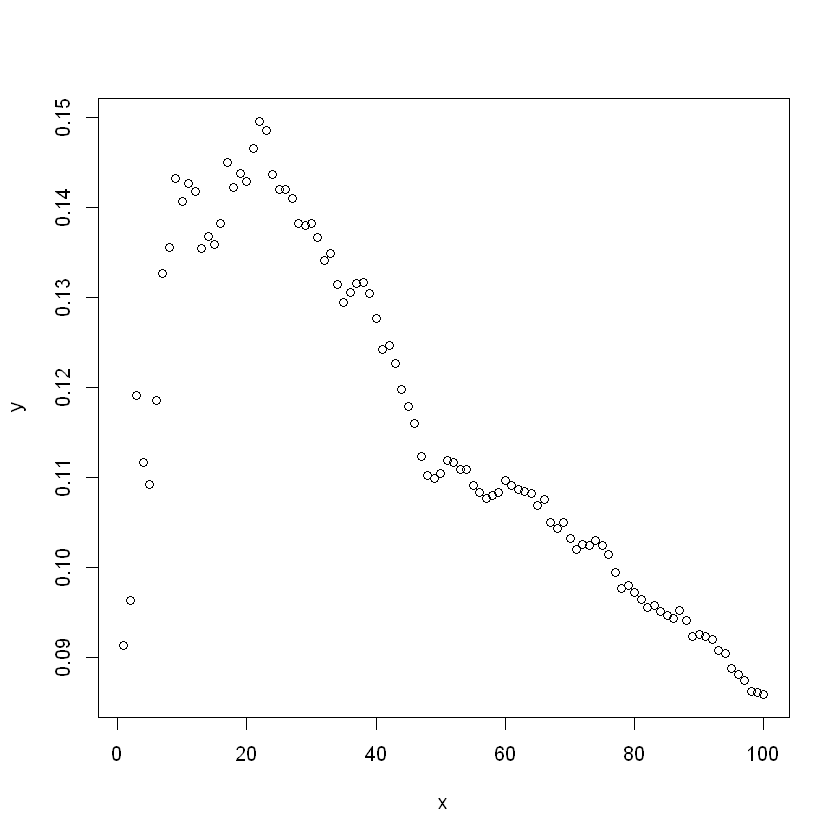

In [562]:
dfbias[, .(y=sd(y)), by=x] %>% plot()

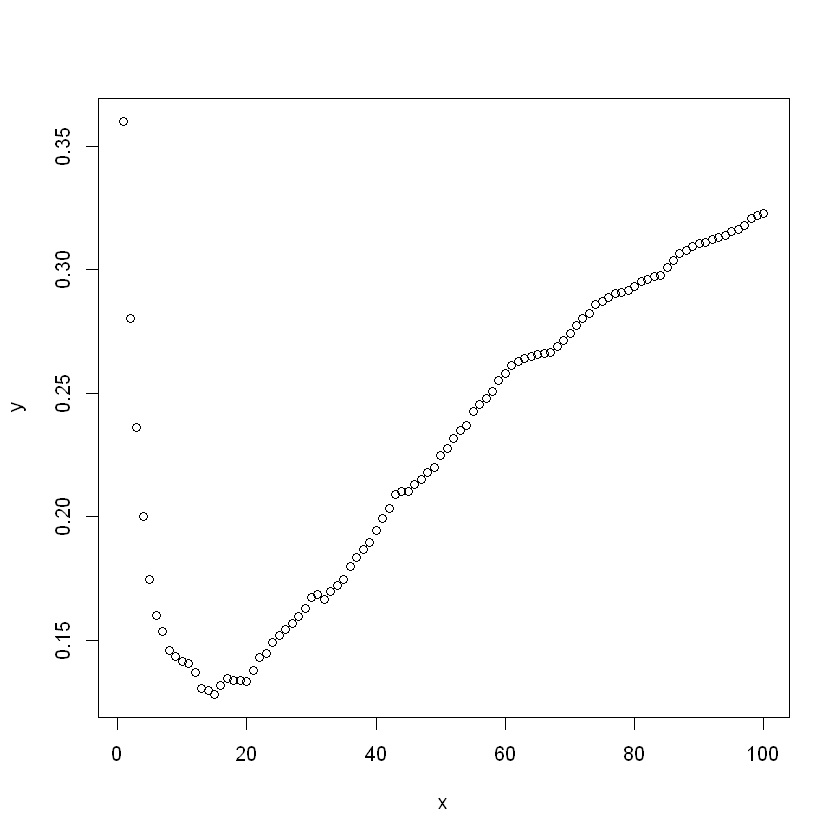

In [561]:
dfbias[, .(y=mean(y)), by=x] %>% plot()

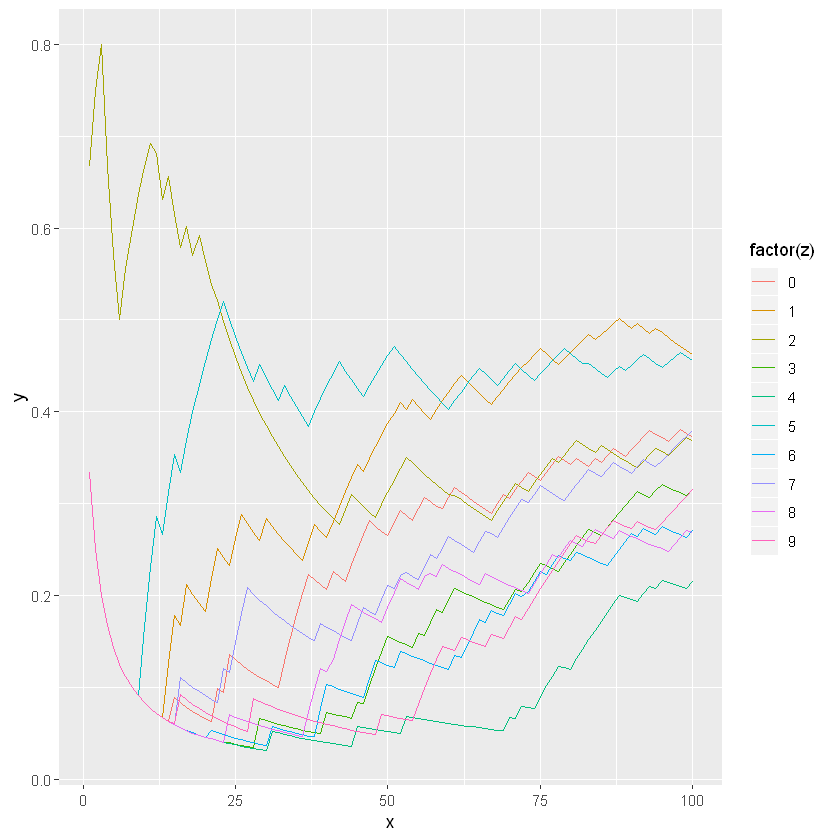

In [560]:
dfbias[z<10] %>% ggplot(aes(x=x,y=y,color=factor(z)))+ geom_line()

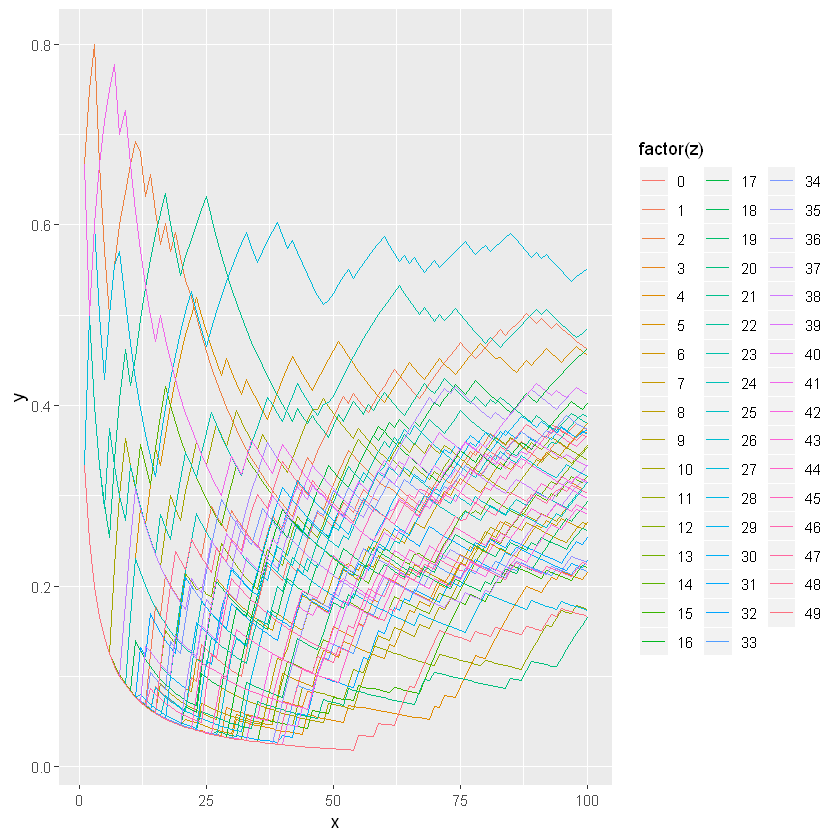

In [559]:
ggplot(dfbias, aes(x=x,y=y,color=factor(z)))+ geom_line()

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): 找不到对象'y'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.ggplot(x)
19. by_layer(function(l, d

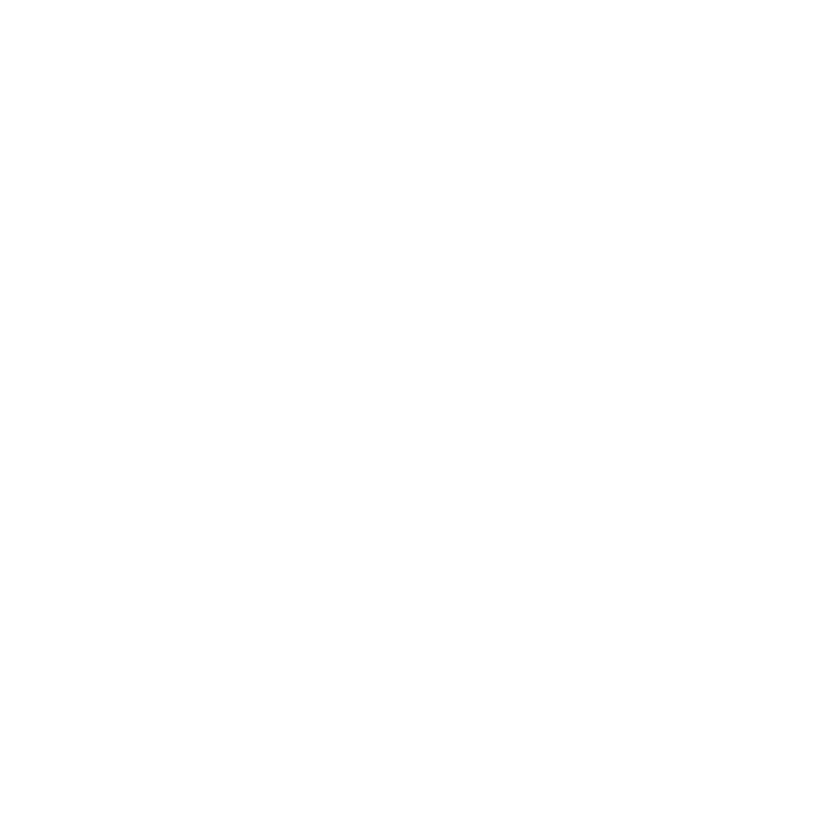

In [544]:
data.table(x=1:100, y=sapply(test, biascurve)) %>% ggplot(aes(x=x,y=y)) + geom_line()

In [543]:
length(sapply(test, biascurve))

[1] 5000

In [542]:
test[[1]][[101]]

$nw
IGRAPH 2bb83c1 UN-- 15 53 -- 
+ attr: name (v/n)
+ edges from 2bb83c1 (vertex names):
 [1]  5--15  3-- 4 10--14  7--14 11--13 11--14  1--14  3--11 12--14  1-- 3
[11]  1--12  1-- 8  6--11  4-- 7 11--12  5--12  1--13  4--10  5--14  6--14
[21]  8--11  8--13 12--13  3--10  8--12  8--14  1-- 6  2--11  2--12  7-- 8
[31]  7--12 11--15 13--14  2-- 8  3--12  7--11  3-- 6  5-- 8  1-- 7  4-- 6
[41]  6-- 7  2--14  3--14  5-- 7  6--10  7--10  7--13  2--13  3-- 7  3--13
[51]  1-- 4  2-- 3  5--13

$newlink
[1] 3

$delink
[1] 5

$sys
      p rank id    alpha pref      soc x           y      report
 1: 0.5    1 15 3.000000    0 1.000000 0 0.113289009 0.005000000
 2: 0.5    2  8 2.928571    0 1.857143 0 0.004154947 0.004154947
 3: 0.5    3  9 2.857143    1 3.571429 0 0.016150796 0.016150796
 4: 0.5    4 11 2.785714    0 2.928571 0 0.659623761 0.005000000
 5: 0.5    5  2 2.714286    0 2.071429 0 0.200320367 0.005000000
 6: 0.5    6 13 2.642857    0 3.785714 0 0.389428868 0.005000000
 7: 0.5    7  5 2

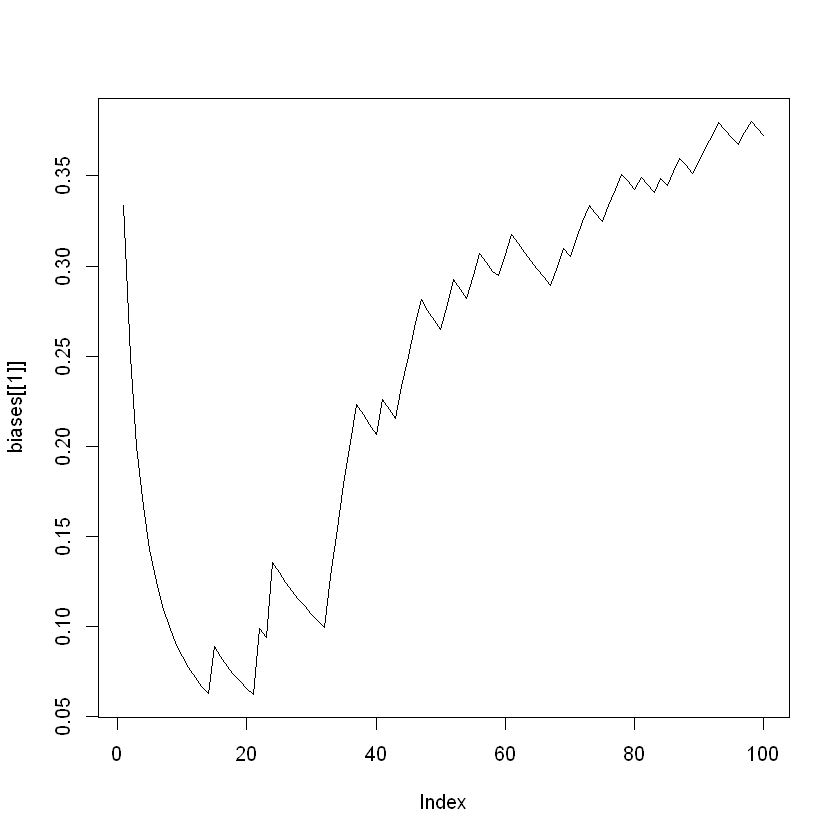

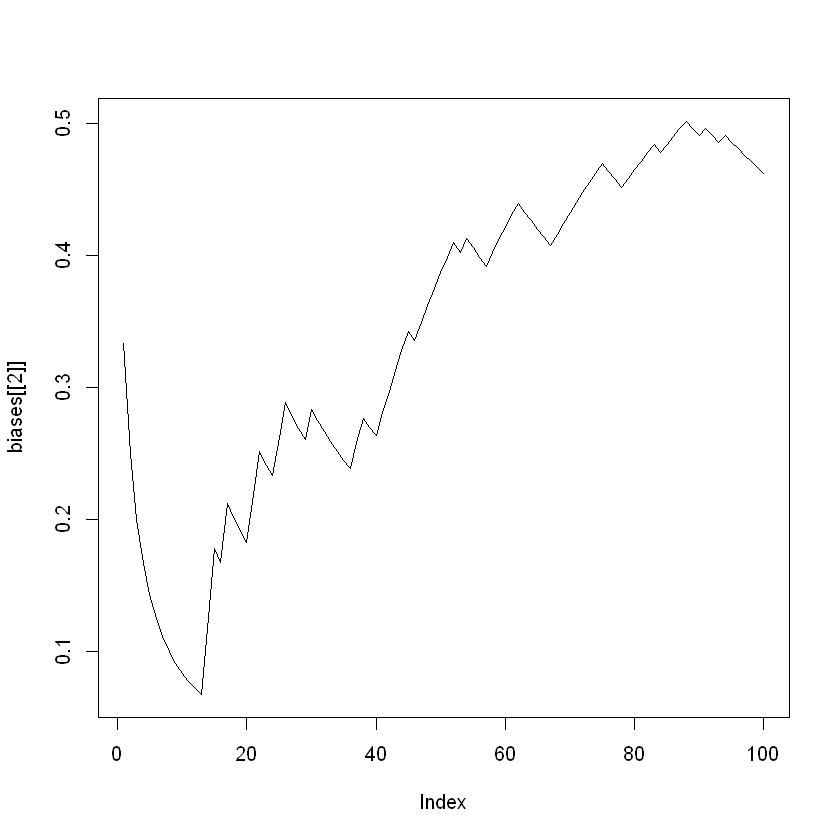

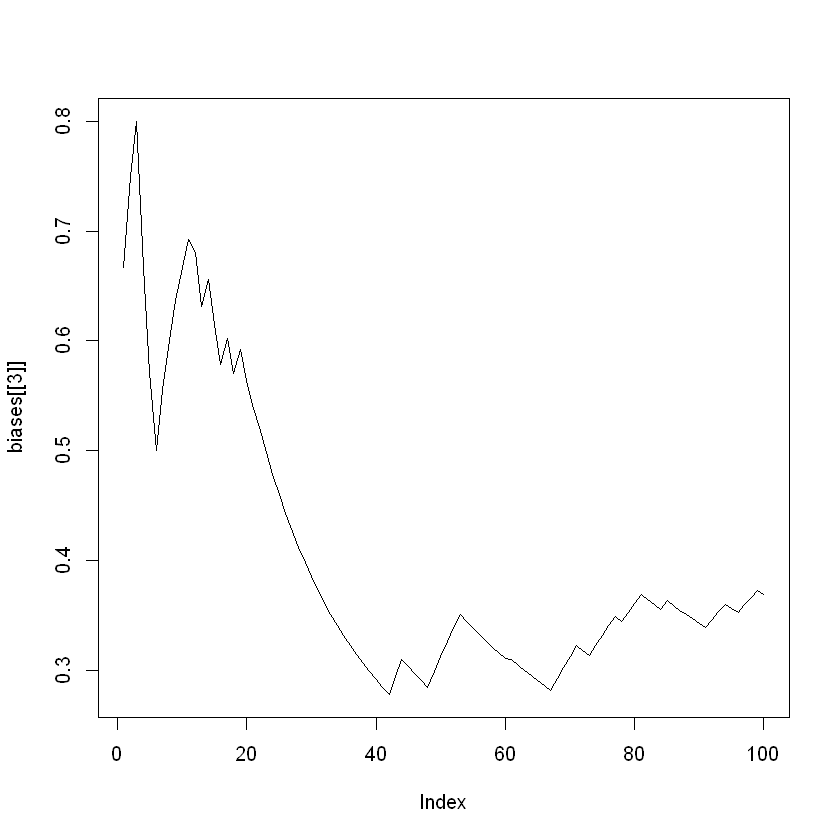

In [540]:
plot(biases[[1]],type='l')
plot(biases[[2]],type='l')
plot(biases[[3]],type='l')


In [ ]:
saveRDS(wholelog, file=paste(npref,'.rds',sep=''))

In [529]:
as.integer(1:599/100)

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[334] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[371] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
[408] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[445] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[482] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[519] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[556] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[593] 5 5 5 5 5 5 5

In [512]:
start =  proc.time()
memo = list()
for(i in 1:10){
    source('cycle.R')
}
end = proc.time()
end-start

   user  system elapsed 
  42.19    0.16   43.14 

In [513]:
sapply(memo, function(m){m$supervisor%>%bias()})

[1] 0.6666500 0.5000000 0.3999820 0.3333067 0.2856793 0.2499568 0.2221708
 [8] 0.1999404 0.1817503 0.1665906

In [495]:
memo[[1]]$supervisor$prior$f == memo[[100]]$supervisor$prior$f

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [514]:
sapply(memo, function(m){m$termlist[[1]]%>%bias()})

[1] 0.6666219 0.5924856 0.6936792 0.7566951 0.6659435 0.7212996 0.7626912
 [8] 0.6602297 0.6969914 0.6270079

In [515]:
memo[[10]]$sys

p,rank,id,alpha,pref,soc,x,y,report
0.5,1,7,3.000000,0,2.928571,0,0.11734696,0.01500000
0.5,2,3,2.928571,0,1.000000,0,0.09727836,0.09727836
0.5,3,9,2.857143,1,4.000000,0,0.38859685,0.76500000
0.5,4,10,2.785714,1,3.571429,0,0.06612418,0.89500000
0.5,5,2,2.714286,0,2.500000,0,0.54488158,0.01500000
0.5,6,6,2.642857,0,3.142857,0,0.06019812,0.06019812
0.5,7,1,2.571429,0,2.714286,0,0.13645602,0.13645602
0.5,8,4,2.500000,1,3.357143,0,0.03881785,0.86500000
0.5,9,8,2.428571,1,1.428571,0,0.17102880,0.82500000
0.5,10,12,2.357143,1,3.785714,0,0.10504531,0.81500000


In [486]:
memo[[10]]$sys$pref

[1] 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1

In [ ]:
log = list()
for(i in 1:100){
    source('cycle.R')
}

In [ ]:
log100 = log

In [475]:
log[[3]]

$nw
IGRAPH a4555d2 UN-- 15 19 -- 
+ attr: name (v/n)
+ edges from a4555d2 (vertex names):
 [1]  1--14  2--14  3-- 4  3-- 8  4--14  5--12  6-- 7  6--11  7-- 9  7--10
[11]  7--11  9--10  9--11 10--11 11--12 12--13  4-- 8  5--15  1-- 2

$newlink
[1] 1

$delink
[1] 1

$sys
      p rank id    alpha pref      soc x         y    report
 1: 0.5    1  9 3.000000    0 3.142857 1 0.8703001 0.3550000
 2: 0.5    2 10 2.928571    0 3.785714 1 0.9836097 0.3550000
 3: 0.5    3  7 2.857143    0 2.928571 1 0.7094112 0.3350000
 4: 0.5    4  2 2.785714    1 2.285714 1 0.7446255 0.9850000
 5: 0.5    5 11 2.714286    0 3.571429 1 0.7393797 0.3050000
 6: 0.5    6  6 2.642857    0 1.000000 1 0.7573354 0.2250000
 7: 0.5    7  1 2.571429    1 2.714286 1 0.6148231 0.9750000
 8: 0.5    8 14 2.500000    1 4.000000 1 0.6458910 0.9750000
 9: 0.5    9 13 2.428571    0 1.214286 1 0.7103961 0.0550000
10: 0.5   10 12 2.357143    0 2.500000 1 0.4576691 0.2250000
11: 0.5   11  4 2.285714    1 3.357143 1 0.2080371 0.965000

In [459]:
log[[3]]$guilty%>%newrank(n)

[1]  3  1  2  4  5  6  7  9  8 10 12 11 13 15 14

In [460]:
log[[3]]$guilty%>%newpos(n)

[1]  2  3  9 12 15

In [ ]:
temp = nw%>%timestep()
nw = temp[[1]]
obsgen(sys)
repos = sapply(termlist, report)
addcol(sys, repos, "report")
output = analysis(supervisor)
sys = penalize(sys, guilty)
termlist = update_term()

log[[i]] = list(
    nw = nw,
    sys = sys,
    termlist = termlist,
    supervisor = supervisor,
    newlink = temp[[2]],
    delink = temp[[3]],
    repos = repos,
    decision = output
    guilty = guilty,
    guiltyid = guiltyid
)

[1] 3
[1] 3


p,rank,id,alpha,pref,soc,x,y,report
0.5,1,12,3.000000,0,3.357143,1,0.7665361,0.00500000
0.5,2,15,2.928571,1,4.000000,1,0.6701555,0.73500000
0.5,3,1,2.857143,0,1.000000,1,0.2130617,0.08954685
0.5,4,2,2.785714,0,1.214286,1,0.5572809,0.00500000
0.5,5,14,2.714286,1,3.785714,1,0.5199546,0.78500000
0.5,6,7,2.642857,0,2.285714,1,0.8842495,0.01500000
0.5,7,9,2.571429,0,2.714286,1,0.5207550,0.41059674
0.5,8,8,2.500000,0,2.500000,1,0.3764844,0.01500000
0.5,9,11,2.428571,0,3.142857,1,0.9235125,0.47759956
0.5,10,3,2.357143,1,1.428571,1,0.5144282,0.84500000


[1] 0.2130617 0.1950000 0.9850000 0.1250000 0.9850000 0.9850000 0.1850000
 [8] 0.1750000 0.1650000 0.9850000 0.1750000 0.2250000 0.9950000 0.9950000
[15] 0.9850000

[1] 0

[1] 0.4462385 0.5055065 0.5025672 0.5202149 0.5120327 0.5213421 0.5000410
 [8] 0.5061423 0.4944147 0.5377112 0.5059648 0.5060635 0.4920761 0.5109086
[15] 0.5103286

integer(0)


p,rank,id,alpha,pref,soc,x,y,report
0.5,1,12,3.000000,0,3.357143,1,0.7665361,0.2250000
0.5,2,15,2.928571,1,4.000000,1,0.6701555,0.9850000
0.5,3,1,2.857143,0,1.000000,1,0.2130617,0.2130617
0.5,4,2,2.785714,0,1.214286,1,0.5572809,0.1950000
0.5,5,14,2.714286,1,3.785714,1,0.5199546,0.9950000
0.5,6,7,2.642857,0,2.285714,1,0.8842495,0.1850000
0.5,7,9,2.571429,0,2.714286,1,0.5207550,0.1650000
0.5,8,8,2.500000,0,2.500000,1,0.3764844,0.1750000
0.5,9,11,2.428571,0,3.142857,1,0.9235125,0.1750000
0.5,10,3,2.357143,1,1.428571,1,0.5144282,0.9850000


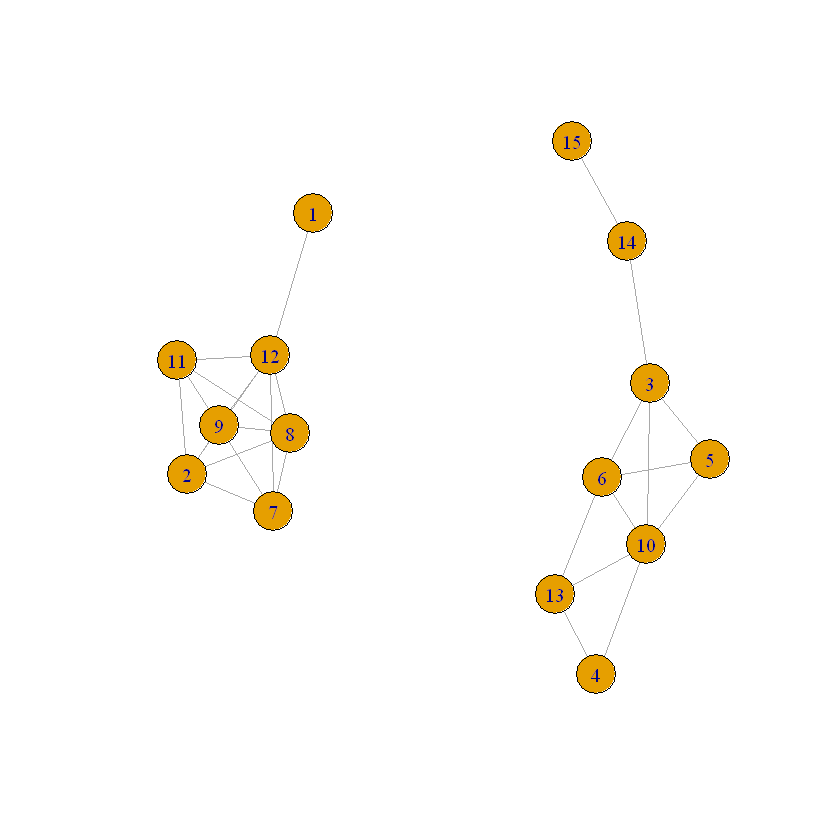

In [440]:
temp = nw%>%timestep()
nw = temp[[1]]
print(temp[[2]])
print(temp[[3]])
plot(nw)
obsgen(sys);sys
repos = sapply(termlist, report);repos
addcol(sys, repos, "report")
output = analysis(supervisor);output
sapply(termlist, bias)
print(guilty)
sys = penalize(sys, guilty);sys
termlist = update_term()